# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

Also note that all of these questions can be answered with one line of code.
____
** Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom. **

In [1]:
import pandas as pd

In [2]:
ecom=pd.read_csv('./EcommercePurchases.csv')

**Check the head of the DataFrame.**

In [3]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


** How many rows and columns are there? **

In [4]:
count_row = ecom.shape[0]  # gives number of row count
count_col = ecom.shape[1]  # gives number of col count
print(count_row) #10,000
print(count_col) #14

10000
14


** What is the average Purchase Price? **

In [5]:
ecom[['Purchase Price']].mean()

Purchase Price    50.347302
dtype: float64

** What were the highest and lowest purchase prices? **

In [6]:
ecom[['Purchase Price']].max()

Purchase Price    99.99
dtype: float64

In [10]:
ecom[['Purchase Price']].min()

Purchase Price    0.0
dtype: float64

** How many people have English 'en' as their Language of choice on the website? **

In [11]:
ecom[(ecom['Language']=='en')].nunique()
#1098

Address             1098
Lot                 1096
AM or PM               2
Browser Info        1041
Company             1071
Credit Card         1098
CC Exp Date          121
CC Security Code     732
CC Provider           10
Email               1098
Job                  518
IP Address          1098
Language               1
Purchase Price      1047
dtype: int64

** How many people have the job title of "Lawyer" ? **


In [12]:
ecom[(ecom['Job']=='Lawyer')].nunique()
#30

Address             30
Lot                 30
AM or PM             2
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         25
CC Security Code    30
CC Provider         10
Email               30
Job                  1
IP Address          30
Language             8
Purchase Price      30
dtype: int64

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [13]:
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

** What are the 5 most common Job Titles? **

In [14]:
(ecom['Job'].value_counts()).head()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Designer, jewellery              27
Purchasing manager               27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [15]:
ecom[(ecom['Lot']=='90 WT')]['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [16]:
ecom[(ecom['Credit Card']==4926535242672853)]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [17]:
ecom[(ecom['CC Provider']=='American Express')][(ecom['Purchase Price']>95)].nunique()
#39

C:\Users\lyun002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Address             39
Lot                 39
AM or PM             2
Browser Info        39
Company             39
Credit Card         39
CC Exp Date         36
CC Security Code    38
CC Provider          1
Email               39
Job                 36
IP Address          39
Language             9
Purchase Price      38
dtype: int64

** Hard: How many people have a credit card that expires in 2025? **

In [7]:
CC_expiry = ecom['CC Exp Date']
def check_CC_expiry(CC_expiry):
    if '25' in CC_expiry:
        return True
    else:
        return False

sum(ecom['CC Exp Date'].apply(check_CC_expiry))

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [8]:
ecom[['Email_1','Email_2']]=ecom.Email.str.split("@",expand=True,)

ecom['Email_2'].value_counts().head()

ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Email_1,Email_2
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,pdunlap,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,anthony41,reed.com
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,amymiller,morales-harrison.com
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,brent16,olson-robinson.info
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,christopherwright,gmail.com


### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

In [9]:
import seaborn as sns

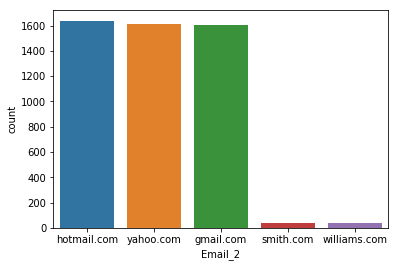

In [10]:
sns.countplot(x='Email_2',data=ecom, order=ecom.Email_2.value_counts().iloc[:5].index)

** Plot distribution of Purchase Price **

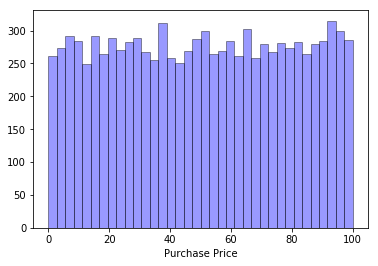

In [14]:
sns.distplot(ecom['Purchase Price'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

** Implement countplot on Language **

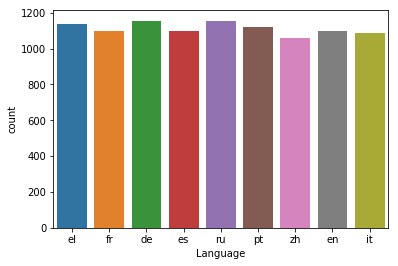

In [15]:
sns.countplot(x='Language',data=ecom,)

In [ ]:
Feel free to plot more graphs to dive deeper into the dataset.

# Great Job!